In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# Cargar datos históricos de ventas (reemplaza 'tu_archivo.csv' con tu archivo CSV)
datos_ventas = pd.read_csv('desafio_modelo_de_demanda.csv')
datos_ventas.head(10)

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2017-01-01,0,6651.737920,1786.0,1943.551087
1,2017-02-01,0,4919.698602,2194.0,1853.111850
2,2017-03-01,0,3277.484704,1178.0,1659.733052
3,2017-04-01,0,5906.864332,1010.0,1580.492875
4,2017-05-01,0,4662.644018,1327.0,1552.062093
5,2017-06-01,0,6342.042090,982.0,1108.069873
6,2017-07-01,0,4025.450305,1041.0,1027.946609
7,2017-08-01,0,5271.820417,874.0,1143.970335
8,2017-09-01,0,4657.933860,1042.0,1038.140169
9,2017-10-01,0,6146.444333,618.0,854.462461


In [3]:
datos_ventas['fecha'] = pd.to_datetime(datos_ventas['fecha'])
datos_ventas = datos_ventas.loc[datos_ventas['prod_id'] == 0]
#filtro fecha 
datos_ventas = datos_ventas[datos_ventas['fecha'].dt.strftime('%Y') == '2023']

datos_ventas.head(12)

,fecha,prod_id,precio_promedio,ventas,modelo_actual
72,2023-01-01,0,5718.490738,2447.0,1662.504452
73,2023-02-01,0,6718.343539,1565.0,1692.611786
74,2023-03-01,0,5742.707352,786.0,1545.866974
75,2023-04-01,0,5267.384648,775.0,1340.509092
76,2023-05-01,0,4020.565431,1063.0,1138.194231
77,2023-06-01,0,4948.433016,952.0,963.581838
78,2023-07-01,0,3135.402008,1934.0,1205.884190
79,2023-08-01,0,3074.172108,1338.0,1281.586404
80,2023-09-01,0,5802.402285,935.0,1190.584138
81,2023-10-01,0,3034.209625,1347.0,1395.354264


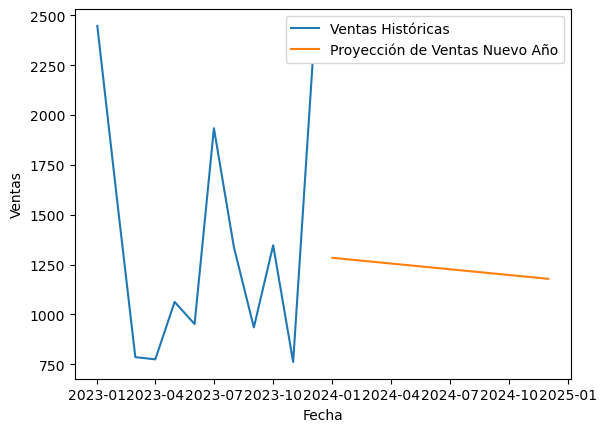

In [7]:
# Crear un conjunto de datos de entrenamiento
X = pd.to_numeric((datos_ventas['fecha'] - datos_ventas['fecha'].min()) / np.timedelta64(1, 'D')).values.reshape(-1, 1)
y = datos_ventas['ventas'].values

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Hacer predicciones para el nuevo año día a día
fechas_nuevo_anio = pd.date_range(start='2024-01-01', end='2024-12-31', freq='MS')
X_nuevo_anio = pd.to_numeric((fechas_nuevo_anio - datos_ventas['fecha'].min()) / np.timedelta64(1, 'D')).values.reshape(-1, 1)
predicciones_nuevo_anio = modelo.predict(X_nuevo_anio)

# Crear DataFrame con las fechas y las proyecciones
proyecciones_df = pd.DataFrame({'fecha': fechas_nuevo_anio, 'proyeccion_ventas': predicciones_nuevo_anio})

#ordernar por fecha
datos_ventas = datos_ventas.sort_values('fecha')
proyecciones_df = proyecciones_df.sort_values('fecha')

# Guardar el DataFrame en un archivo Excel
#proyecciones_df.to_excel('proyecciones_ventas_nuevo_anio.xlsx', index=False)

# Visualizar las predicciones
plt.plot(datos_ventas['fecha'], y, label='Ventas Históricas')
plt.plot(proyecciones_df['fecha'], proyecciones_df['proyeccion_ventas'], label='Proyección de Ventas Nuevo Año')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [5]:
proyecciones_df.head()
proyecciones_df.to_excel('proyecciones.xlsx', index=False)